<a href="https://colab.research.google.com/github/Yumlembam/Basic-CNN/blob/master/Convolution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%load_ext autoreload
%autoreload 2

np.random.seed(1)

Single channel slice [[ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
 [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]
 [ 0.3190391  -0.24937038  1.46210794 -2.06014071]]
Single Channel slice [[-0.3224172  -0.38405435]
 [ 1.13376944 -1.09989127]]
bias of single channel [[-0.17242821]]


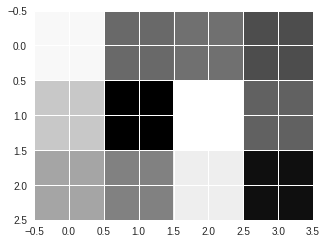

In [0]:
np.random.seed(1)
Single_channel_slice = np.random.randn(3,4) # single channel matrix
Single_channel_W = np.random.randn(2,2)
Single_channel_b = np.random.randn(1,1)
print("Single channel slice", Single_channel_slice)
print("Single Channel slice",Single_channel_W)
print("bias of single channel",Single_channel_b) # Bias is not use here

plt.imshow(Single_channel_slice, interpolation='nearest')
plt.show()

##Single Channel Convolution

Convolution operation **S(i,j) = (I*k)(i,j)=$\sum_{m=o}^k$$\sum_{n=0}^q$I(i+m,j+n)K(m,n)**

[[0. 0. 0.]
 [0. 0. 0.]]
Result of convolution [[ 3.22384586 -4.12843001  3.39782902]
 [ 1.24089073 -1.81893515  3.65341157]]


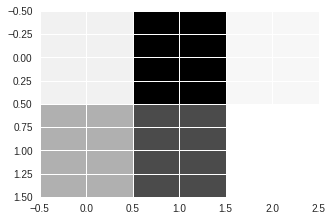

In [0]:
Z = np.zeros((2,3))
print(Z)
for i in range(0,2): # number of down sliding
  for j in range (0,3): # number of side sliding
    for m in range (0,2): # height of the kerel
      for n in range(0,2): # width of the kernel
        Z[i,j] = Z[i,j] + Single_channel_slice[i+m,j+n]*Single_channel_W[m,n]
        
print("Result of convolution",Z)

plt.imshow(Z, interpolation='nearest')
plt.show()
      

##Multi Channel Convolution

Software implementation usually works with 4-D tensors,with fourth axis indexing different examples in the batch

Assume we have a 4-D kernel tensor K with element Ki,j,k,l giving the connection
strength between a unit in channel i of the output and a unit in channel j of the
input, with an offset of k rows and l columns between the output unit and the
input unit. Assume our input consists of observed data V with element Vi,j,k giving
the value of the input unit within channel i at row j and column k . Assume our
output consists of Z with the same format as V. If Z is produced by convolving K
across V without flipping K, then

**$Z_{i},_{j},_{k}=\sum_{l,m,n} V_{l},_{j+m-1},_{k+n-1}K_{i},_{l},_{m},_{n}$**



In linear algebra notation, we index into
arrays using a 1 for the first entry. This necessitates the −1 in the above formula. But in programming language like c we can just remove it.

**$Z_{i},_{j},_{k}=\sum_{l,m,n} V_{l},_{j+m},_{k+n}K_{i},_{l},_{m},_{n}$**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Multi Channel Slice [[[ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
  [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]
  [ 0.3190391  -0.24937038  1.46210794 -2.06014071]]

 [[-0.3224172  -0.38405435  1.13376944 -1.09989127]
  [-0.17242821 -0.87785842  0.04221375  0.58281521]
  [-1.10061918  1.14472371  0.90159072  0.50249434]]

 [[ 0.90085595 -0.68372786 -0.12289023 -0.93576943]
  [-0.26788808  0.53035547 -0.69166075 -0.39675353]
  [-0.6871727  -0.84520564 -0.67124613 -0.0126646 ]]]
Multi Channel Kernel [[[[-1.11731035  0.2344157 ]
   [ 1.65980218  0.74204416]]

  [[-0.19183555 -0.88762896]
   [-0.74715829  1.6924546 ]]

  [[ 0.05080775 -0.63699565]
   [ 0.19091548  2.10025514]]]]


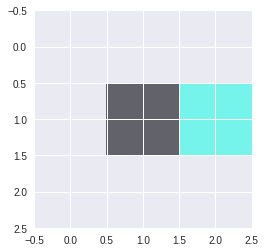

Debugging -1.1173103486352778


In [0]:
np.random.seed(1)
Multi_channel_slice = np.random.randn(3,3,4)
Multi_channel_kernel = np.random.randn(1,3,2,2) # only one kernel in real convolution we need multiple kernel
print("Multi Channel Slice",Multi_channel_slice)
print("Multi Channel Kernel",Multi_channel_kernel)

plt.imshow(Multi_channel_slice,interpolation='nearest')
plt.show()

print("Debugging",Multi_channel_kernel[0,0,0,0])

In [0]:
result_multichannel = np.zeros((1,2,3))
print(result_multichannel)
for i in range (0,1): # number of filter
  for j in range (0,2): # number of down sliding
    for k in range (0,3): # number of side sliding
      for l in range (0,3): #number of channel in both input and kernel
        for m in range(0,2):# kernel dimension
          for n in range(0,2):
            result_multichannel[i,j,k] = result_multichannel[i,j,k] + Multi_channel_slice[l,j+m,k+n]*Multi_channel_kernel[i,l,m,n]

print(result_multichannel)
      
    

[[[0. 0. 0.]
  [0. 0. 0.]]]
[[[-1.63985663 -3.47887792  4.0079552 ]
  [ 0.15228802  3.34951337 -1.51560605]]]


In [0]:
# GRADED FUNCTION: zero_pad

def zero_pad_try(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad = np.pad(X, ((0, 0), (1, 1), (0, 0)), 'constant', constant_values=0)
    
    ### END CODE HERE ###
    
    return X_pad

In [0]:
Zero_padded_multi_slice = zero_pad_try(Multi_channel_slice,2)
print(Zero_padded_multi_slice)

[[[ 0.          0.          0.          0.        ]
  [ 1.62434536 -0.61175641 -0.52817175 -1.07296862]
  [ 0.86540763 -2.3015387   1.74481176 -0.7612069 ]
  [ 0.3190391  -0.24937038  1.46210794 -2.06014071]
  [ 0.          0.          0.          0.        ]]

 [[ 0.          0.          0.          0.        ]
  [-0.3224172  -0.38405435  1.13376944 -1.09989127]
  [-0.17242821 -0.87785842  0.04221375  0.58281521]
  [-1.10061918  1.14472371  0.90159072  0.50249434]
  [ 0.          0.          0.          0.        ]]

 [[ 0.          0.          0.          0.        ]
  [ 0.90085595 -0.68372786 -0.12289023 -0.93576943]
  [-0.26788808  0.53035547 -0.69166075 -0.39675353]
  [-0.6871727  -0.84520564 -0.67124613 -0.0126646 ]
  [ 0.          0.          0.          0.        ]]]


In [0]:
# GRADED FUNCTION: zero_pad

def zero_pad(X_value, pad_value):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)
    """
    
    ### START CODE HERE ### (≈ 1 line)
    X_pad_value = np.pad(X_value, ((0, 0), (pad_value, pad_value), (pad_value, pad_value), (0, 0)), 'constant', constant_values=0)
    ### END CODE HERE ###
    
    return X_pad_value

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1,1] = [[ 0.90085595 -0.68372786]
 [-0.12289023 -0.93576943]
 [-0.26788808  0.53035547]]
x_pad[1,1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


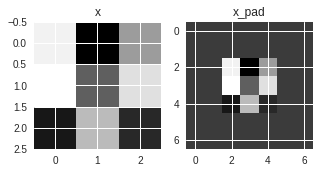

In [0]:
np.random.seed(1)
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1,1] =", x[1,1])
print ("x_pad[1,1] =", x_pad[0,1,])


fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

In [0]:
# GRADED FUNCTION: conv_single_step

def conv_single_step(a_slice_prev, W, b):
    """
    Apply one filter defined by parameters W on a single slice (a_slice_prev) of the output activation 
    of the previous layer.
    
    Arguments:
    a_slice_prev -- slice of input data of shape (f, f, n_C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, n_C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1, 1, 1)
    
    Returns:
    Z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """

    ### START CODE HERE ### (≈ 2 lines of code)
    # Element-wise product between a_slice and W. Do not add the bias yet.
    s = np.multiply(a_slice_prev, W)
    # Sum over all entries of the volume s.
    Z = np.sum(s)
    # Add bias b to Z. Cast b to a float() so that Z results in a scalar value.
    Z = Z + float(b)
    ### END CODE HERE ###

    return Z

In [0]:
np.random.seed(1)
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = conv_single_step(a_slice_prev, W, b)
print("Z =", Z)

Z = -6.999089450680221


In [0]:
# GRADED FUNCTION: conv_forward

def conv_forward(A_prev, W, b, hparameters):
    """
    Implements the forward propagation for a convolution function
    
    Arguments:
    A_prev -- output activations of the previous layer, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    W -- Weights, numpy array of shape (f, f, n_C_prev, n_C)
    b -- Biases, numpy array of shape (1, 1, 1, n_C)
    hparameters -- python dictionary containing "stride" and "pad"
        
    Returns:
    Z -- conv output, numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward() function
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from A_prev's shape (≈1 line)  
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape (≈1 line)
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters" (≈2 lines)
    stride = hparameters['stride']
    pad = hparameters['pad']
    
    # Compute the dimensions of the CONV output volume using the formula given above. Hint: use int() to floor. (≈2 lines)
    n_H = int((n_H_prev - f + 2 * pad) / stride) + 1
    n_W = int((n_W_prev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros. (≈1 line)
    Z = np.zeros((m, n_H, n_W, n_C))
    
    # Create A_prev_pad by padding A_prev
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                               # loop over the batch of training examples
        a_prev_pad = A_prev_pad[i]                               # Select ith training example's padded activation
        for h in range(n_H):                           # loop over vertical axis of the output volume
            for w in range(n_W):                       # loop over horizontal axis of the output volume
                for c in range(n_C):                   # loop over channels (= #filters) of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the (3D) slice of a_prev_pad (See Hint above the cell). (≈1 line)
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                    
                    # Convolve the (3D) slice with the correct filter W and bias b, to get back one output neuron. (≈1 line)
                    Z[i, h, w, c] = conv_single_step(a_slice_prev, W[...,c], b[...,c])
                                        
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(Z.shape == (m, n_H, n_W, n_C))
    print("The shape of Z is",Z.shape)
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    #print("printing cache")
    #print(cache)
    
    return Z, cache

In [0]:
np.random.seed(1)
A_prev = np.random.randn(10,4,4,3)
W = np.random.randn(2,2,3,8)
b = np.random.randn(1,1,1,8)
hparameters = {"pad" : 2,
               "stride": 2}
Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("The value of Z is",Z)
print("Z's mean =", np.mean(Z))
print("Z[3,2,1] =", Z[3,2,1])
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

The shape of Z is (10, 4, 4, 8)
The value of Z is [[[[  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]
   [  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]
   [  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]
   [  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]]

  [[  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]
   [ -5.62626365  -0.85327034   0.30276347 ...  -6.80726038
     -1.23309753   2.64990283]
   [  2.08987783  -2.79690946  -0.72067882 ...   6.32999645
     -1.99398264   9.27399969]
   [  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]]

  [[  0.37245685  -0.1484898   -0.1834002  ...  -0.6294416
     -1.1134361   -0.06741002]
   [ -1.39647145  -6.02091128  -2.90853467 ...  -4.53265357
     -1.03240479  -0.76496589]
   [ -3.52376467   2.50067997  -3.70139219 

In [0]:
# GRADED FUNCTION: pool_forward

def pool_forward(A_prev, hparameters, mode = "max"):
    """
    Implements the forward pass of the pooling layer
    
    Arguments:
    A_prev -- Input data, numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    hparameters -- python dictionary containing "f" and "stride"
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    A -- output of the pool layer, a numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache used in the backward pass of the pooling layer, contains the input and hparameters 
    """
    
    # Retrieve dimensions from the input shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    # Define the dimensions of the output
    n_H = int(1 + (n_H_prev - f) / stride)
    n_W = int(1 + (n_W_prev - f) / stride)
    n_C = n_C_prev
    
    # Initialize output matrix A
    A = np.zeros((m, n_H, n_W, n_C))              
    
    ### START CODE HERE ###
    for i in range(m):                         # loop over the training examples
        for h in range(n_H):                     # loop on the vertical axis of the output volume
            for w in range(n_W):                 # loop on the horizontal axis of the output volume
                for c in range (n_C):            # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the current slice on the ith training example of A_prev, channel c. (≈1 line)
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    # Compute the pooling operation on the slice. Use an if statment to differentiate the modes. Use np.max/np.mean.
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
    ### END CODE HERE ###
    
    # Store the input and hparameters in "cache" for pool_backward()
    cache = (A_prev, hparameters)
    
    # Making sure your output shape is correct
    assert(A.shape == (m, n_H, n_W, n_C))
    
    return A, cache
            
        
    

In [0]:
np.random.seed(1)
A_prev = np.random.randn(2,4,4,3)
hparameters = {"stride":2, "f":2}
A,cache = pool_forward(A_prev,hparameters)
print("mode = max")
print("A =", A.shape)
print(A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A.shape)

mode = max
A = (2, 2, 2, 3)
[[[[ 1.62434536  0.86540763  1.13376944]
   [ 1.74481176  1.46210794  0.50249434]]

  [[ 0.90085595  0.2344157   1.65980218]
   [-0.63699565  1.6924546   2.10025514]]]


 [[[ 0.12015895  1.25286816  0.51292982]
   [ 1.13162939  1.51981682  2.18557541]]

  [[ 0.37756379  0.87616892  1.12948391]
   [ 1.19891788  0.76201118  0.41005165]]]]

mode = average
A = (2, 2, 2, 3)


In [0]:
def conv_backward(dZ, cache):
    """
    Implement the backward propagation for a convolution function
    
    Arguments:
    dZ -- gradient of the cost with respect to the output of the conv layer (Z), numpy array of shape (m, n_H, n_W, n_C)
    cache -- cache of values needed for the conv_backward(), output of conv_forward()
    
    Returns:
    dA_prev -- gradient of the cost with respect to the input of the conv layer (A_prev),
               numpy array of shape (m, n_H_prev, n_W_prev, n_C_prev)
    dW -- gradient of the cost with respect to the weights of the conv layer (W)
          numpy array of shape (f, f, n_C_prev, n_C)
    db -- gradient of the cost with respect to the biases of the conv layer (b)
          numpy array of shape (1, 1, 1, n_C)
    """
    
    ### START CODE HERE ###
    # Retrieve information from "cache"
    (A_prev, W, b, hparameters) = cache
    
    # Retrieve dimensions from A_prev's shape
    (m, n_H_prev, n_W_prev, n_C_prev) = A_prev.shape
    
    # Retrieve dimensions from W's shape
    (f, f, n_C_prev, n_C) = W.shape
    
    # Retrieve information from "hparameters"
    stride = hparameters["stride"]
    pad = hparameters["pad"]
    
    # Retrieve dimensions from dZ's shape
    (m, n_H, n_W, n_C) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, n_H_prev, n_W_prev, n_C_prev))                           
    dW = np.zeros((f, f, n_C_prev, n_C))
    db = np.zeros((1, 1, 1, n_C))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                       # loop over the training examples
        
        # select ith training example from A_prev_pad and dA_prev_pad
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(n_H):                   # loop over vertical axis of the output volume
            for w in range(n_W):               # loop over horizontal axis of the output volume
                for c in range(n_C):           # loop over the channels of the output volume
                    
                    # Find the corners of the current "slice"
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Use the corners to define the slice from a_prev_pad
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]

                    # Update gradients for the window and the filter's parameters using the code formulas given above
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad (Hint: use X[pad:-pad, pad:-pad, :])
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    ### END CODE HERE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == (m, n_H_prev, n_W_prev, n_C_prev))
    
    return dA_prev, dW, db

In [0]:
np.random.seed(1)
dA,dW,db = conv_backward(Z,cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

print(dA.shape)
print(dW.shape)

dA_mean = 0.6347704472654743
dW_mean = 1.5572657428497354
db_mean = 7.839232564616838
(10, 4, 4, 3)
(2, 2, 3, 8)


##Pooling layer backward pass

In [0]:
# max polling
def create_mask_from_window(x):
    """
    Creates a mask from an input matrix x, to identify the max entry of x.
    
    Arguments:
    x -- Array of shape (f, f)
    
    Returns:
    mask -- Array of the same shape as window, contains a True at the position corresponding to the max entry of x.
    """
    
    ### START CODE HERE ### (≈1 line)
    mask = x == np.max(x)
    ### END CODE HERE ###
    
    return mask

In [0]:
np.random.seed(1)
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
mask =  [[ True False False]
 [False False False]]


In [0]:
#Average pooling
def distribute_value(dz, shape):
    """
    Distributes the input value in the matrix of dimension shape
    
    Arguments:
    dz -- input scalar
    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    
    Returns:
    a -- Array of size (n_H, n_W) for which we distributed the value of dz
    """
    
    ### START CODE HERE ###
    # Retrieve dimensions from shape (≈1 line)
    (n_H, n_W) = shape
    
    # Compute the value to distribute on the matrix (≈1 line)
    average = dz / (n_H * n_W)
    
    # Create a matrix where every entry is the "average" value (≈1 line)
    a = np.ones(shape) * average
    ### END CODE HERE ###
    
    return a

In [0]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


In [0]:
## puttiing it together:pooling backward
def pool_backward(dA, cache, mode = "max"):
    """
    Implements the backward pass of the pooling layer
    
    Arguments:
    dA -- gradient of cost with respect to the output of the pooling layer, same shape as A
    cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters 
    mode -- the pooling mode you would like to use, defined as a string ("max" or "average")
    
    Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev
    """
    
    ### START CODE HERE ###
    
    # Retrieve information from cache (≈1 line)
    (A_prev, hparameters) = cache
    
    # Retrieve hyperparameters from "hparameters" (≈2 lines)
    stride = hparameters["stride"]
    f = hparameters["f"]
    
    # Retrieve dimensions from A_prev's shape and dA's shape (≈2 lines)
    m, n_H_prev, n_W_prev, n_C_prev = A_prev.shape
    m, n_H, n_W, n_C = dA.shape
    
    # Initialize dA_prev with zeros (≈1 line)
    dA_prev = np.zeros(A_prev.shape)
    
    for i in range(m):                       # loop over the training examples
        # select training example from A_prev (≈1 line)
        a_prev = A_prev[i]
        for h in range(n_H):                   # loop on the vertical axis
            for w in range(n_W):               # loop on the horizontal axis
                for c in range(n_C):           # loop over the channels (depth)
                    # Find the corners of the current "slice" (≈4 lines)
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
                    # Compute the backward propagation in both modes.
                    if mode == "max":
                        # Use the corners and "c" to define the current slice from a_prev (≈1 line)
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                        # Create the mask from a_prev_slice (≈1 line)
                        mask = create_mask_from_window(a_prev_slice)
                        # Set dA_prev to be dA_prev + (the mask multiplied by the correct entry of dA) (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        # Get the value a from dA (≈1 line)
                        da = dA[i, h, w, c]
                        print("da shape")
                        print(da)
                        # Define the shape of the filter as fxf (≈1 line)
                        shape = (f, f)
                        # Distribute it to get the correct slice of dA_prev. i.e. Add the distributed value of da. (≈1 line)
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)
                        
    ### END CODE ###
    
    # Making sure your output shape is correct
    assert(dA_prev.shape == A_prev.shape)
    
    return dA_prev

In [0]:
np.random.seed(1)
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  

dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1]) 

mode = max
mean of dA =  0.14571390272918056
dA_prev[1,1] =  [[ 0.          0.        ]
 [ 5.05844394 -1.68282702]
 [ 0.          0.        ]]
da shape
-0.31011677351806
da shape
-2.434837764107139
da shape
1.038824601859414
da shape
2.1869796469742577
da shape
0.44136444356858207
da shape
-0.10015523328349978
da shape
-0.13644474389603303
da shape
-0.11905418777480989
da shape
0.0174094083000046
da shape
-1.1220187287468883
da shape
-0.5170944579202279
da shape
-0.997026827650263
da shape
0.2487991613877705
da shape
-0.29664115237086275
da shape
0.4952113239779604
da shape
-0.17470315974250095
da shape
0.9863351878212421
da shape
0.2135339013354418
da shape
2.1906997289697334
da shape
-1.8963609228910925
da shape
-0.646916688254908
da shape
0.901486891648711
da shape
2.528325706806398
da shape
-0.24863477771546005
da shape
0.043668993178389105
da shape
-0.22631424251360518
da shape
1.3314571125875918
da shape
-0.2873078634760189
da shape
0.6800698398781045
da shape
-0.3198015988986712